In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = r"D:\Python\Python project 1_1\TWO_CENTURIES_OF_UM_RACES.csv"

In [4]:
df = pd.read_csv(file_path)

C:\Users\romas\AppData\Local\Temp\ipykernel_19296\2618208116.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [5]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Year of event              int64  
 1   Event dates                object 
 2   Event name                 object 
 3   Event distance/length      object 
 4   Event number of finishers  int64  
 5   Athlete performance        object 
 6   Athlete club               object 
 7   Athlete country            object 
 8   Athlete year of birth      float64
 9   Athlete gender             object 
 10  Athlete age category       object 
 11  Athlete average speed      object 
 12  Athlete ID                 int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 740.0+ MB


In [7]:
df = df[df['Event name'].str.split('(', expand=True).get(1).str.replace(')', '') == 'POL']

In [8]:
df = df[df['Event distance/length'].isin(['50km', '100km'])]

In [9]:
df2 = df.query('`Year of event` >= 2000').copy()

In [10]:
df2.dropna(subset='Athlete year of birth', inplace=True)

In [11]:
df2.drop_duplicates(keep='last', inplace=True)

In [12]:
df2.loc[:, 'Athlete age'] = df2['Year of event'] - df2['Athlete year of birth']
df2.loc[:, 'Athlete age'] = df2['Athlete age'].astype(str).str.replace('.0', '')
df2.loc[:, 'Athlete age'] = df2['Athlete age'].astype(int)

In [13]:
df2.loc[:, 'Athlete performance'] = df2['Athlete performance'].str.split(' ', expand=True).get(0)
df2.loc[:, 'Athlete performance'] = df2['Athlete performance'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [14]:
df2['Athlete average speed'] = df2['Athlete average speed'].astype(float)

In [15]:
df2['Age group'] = pd.cut(x=df2['Athlete age'], bins=[0, 14, 20, 35, 45, 55, 65, 100])

In [16]:
df2.rename(columns={"Event distance/length": "Distance/length", "Event name": "Event"}, inplace=True)

In [17]:
df2.drop(['Athlete year of birth', 'Athlete age category', 'Athlete ID'], axis=1, inplace=True)

In [18]:
df2.reset_index(drop = True, inplace=True)


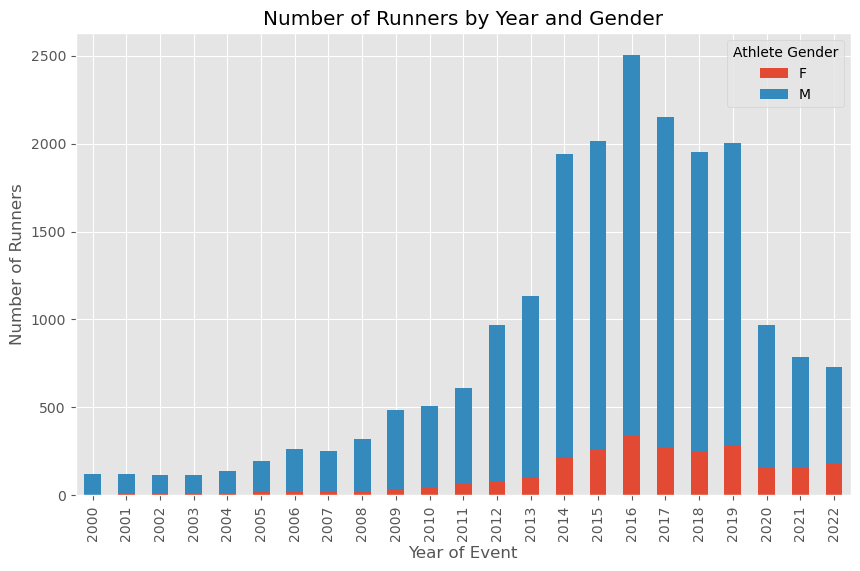

In [19]:
plt.style.use('ggplot')
runners_by_year_gender = df2.groupby(['Year of event', 'Athlete gender']).size().unstack(fill_value=0)
runners_by_year_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Runners by Year and Gender')
plt.xlabel('Year of Event')
plt.ylabel('Number of Runners')
plt.legend(title='Athlete Gender')
plt.show()

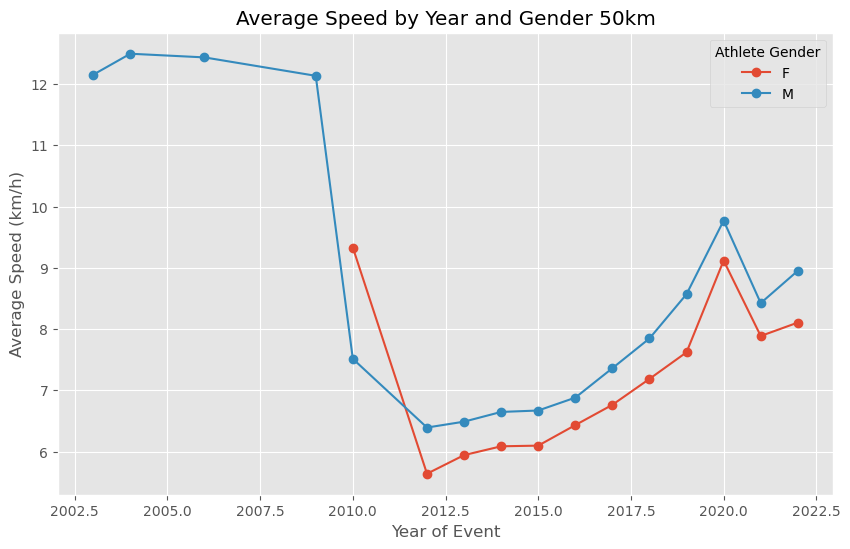

In [20]:
average_speed_by_year_gender = df2[df2['Distance/length'] == '50km'].groupby(['Year of event', 'Athlete gender'])['Athlete average speed'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
average_speed_by_year_gender.plot(kind='line', ax=ax, marker='o')
ax.set_title('Average Speed by Year and Gender 50km')
ax.set_xlabel('Year of Event')
ax.set_ylabel('Average Speed (km/h)')
ax.legend(title='Athlete Gender')
plt.show()

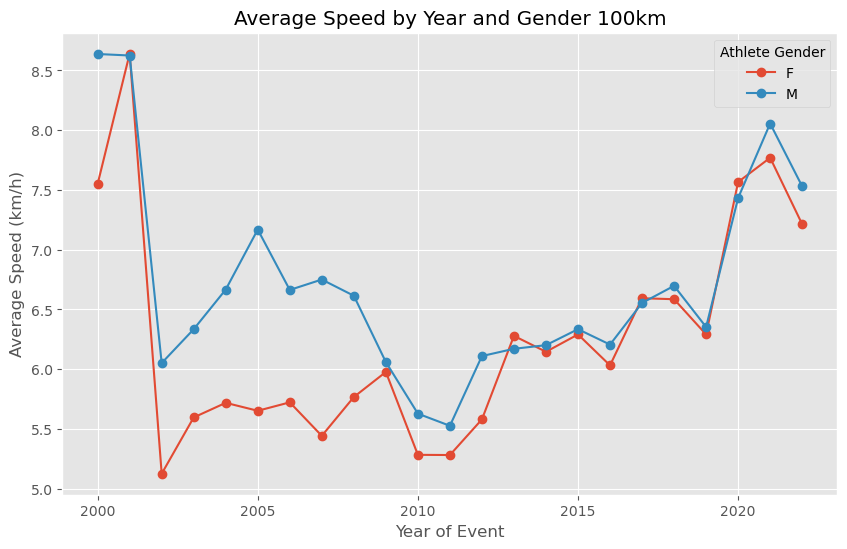

In [21]:
average_speed_by_year_gender = df2[df2['Distance/length'] == '100km'].groupby(['Year of event', 'Athlete gender'])['Athlete average speed'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 6))
average_speed_by_year_gender.plot(kind='line', ax=ax, marker='o')
ax.set_title('Average Speed by Year and Gender 100km')
ax.set_xlabel('Year of Event')
ax.set_ylabel('Average Speed (km/h)')
ax.legend(title='Athlete Gender')
plt.show()

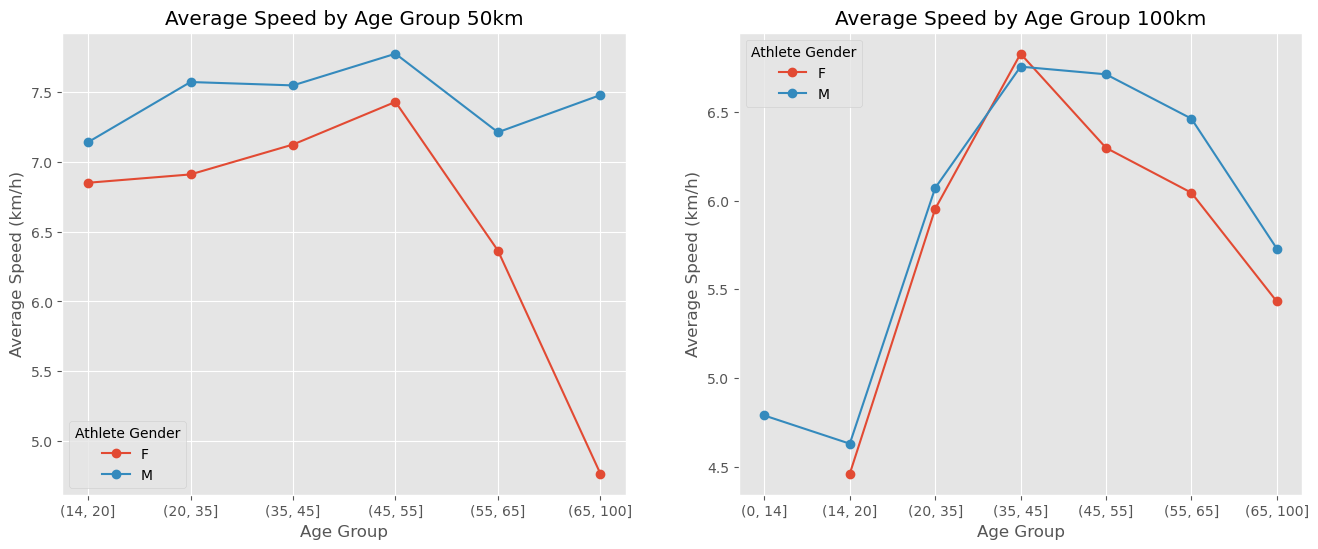

In [33]:
average_speed_by_age_group_50km = df2[df2['Distance/length'] == '50km'].groupby(['Age group', 'Athlete gender'], \
                                                                                observed=True)['Athlete average speed'].mean().unstack()
average_speed_by_age_group_100km = df2[df2['Distance/length'] == '100km'].groupby(['Age group', 'Athlete gender'],\
                                                                                observed=True)['Athlete average speed'].mean().unstack()
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

lines = average_speed_by_age_group_50km.plot(kind='line', ax=ax[0], marker='o')
lines = average_speed_by_age_group_100km.plot(kind='line', ax=ax[1], marker='o')
ax[0].set_title('Average Speed by Age Group 50km')
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Average Speed (km/h)')
ax[0].legend(title='Athlete Gender', loc=3)
ax[1].set_title('Average Speed by Age Group 100km')
ax[1].set_xlabel('Age Group')
ax[1].set_ylabel('Average Speed (km/h)')
ax[1].legend(title='Athlete Gender', loc=2)
plt.grid(axis='y')

## MOST POPOLAR EVENT 50

In [75]:
df2[df2['Distance/length'] == '50km'].groupby(['Event', 'Year of event'])['Athlete performance']\
.count().reset_index(name='Renners').sort_values(['Renners'], ascending=False).head(10).reset_index(drop = True)

,Event,Year of event,Renners
0,Ultramaraton Chudy Wawrzyniec 50 Km (POL),2016,498
1,Ultramaraton Chudy Wawrzyniec 50 Km (POL),2015,493
2,Supermaraton Gor Stolowych (POL),2014,415
3,Supermaraton Gor Stolowych (POL),2017,386
4,Ultramaraton Chudy Wawrzyniec 50 Km (POL),2014,376
5,Supermaraton Gor Stolowych (POL),2015,360
6,Beskidzka 160 Na Raty Salamandra Ultra Trail 5...,2019,272
7,Bison Ultra-Trail 50 (POL),2020,270
8,Bison Ultra-Trail 50 (POL),2022,269
9,Supermaraton Gor Stolowych (POL),2016,264


## MOST POPOLAR EVENT 100km

In [76]:
df2[df2['Distance/length'] == '100km'].groupby(['Event', 'Year of event'])['Athlete performance']\
.count().reset_index(name='Renners').sort_values(['Renners'], ascending=False).head(10).reset_index(drop = True)

,Event,Year of event,Renners
0,Bieg 7 dolin - 100 km Ultramaraton (POL),2017,542
1,Bieg 7 dolin - 100 km Ultramaraton (POL),2014,501
2,Bieg 7 dolin - 100 km Ultramaraton (POL),2018,479
3,Bieg 7 dolin - 100 km Ultramaraton (POL),2015,451
4,Bieg 7 dolin - 100 km Ultramaraton (POL),2016,450
5,Bieg 7 dolin - 100 km Ultramaraton (POL),2019,426
6,Limanowski Ekstremalny Maraton Pieszy KIERAT (...,2014,420
7,Limanowski Ekstremalny Maraton Pieszy KIERAT (...,2013,387
8,Limanowski Ekstremalny Maraton Pieszy KIERAT (...,2019,383
9,Limanowski Ekstremalny Maraton Pieszy KIERAT (...,2015,375
